# Bereinigung der einzelnen Datensätze

## Importieren der Datensätze und Pythonmodule

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import scipy.stats as stats

df_besucher = pd.read_csv('data/besucher.csv', decimal = ',', sep = ";")   
df_kunden = pd.read_csv('data/kunden.csv', decimal = '.', sep = ";")
df_geo = pd.read_csv('data/geo.txt', decimal = '.', delimiter = "\t")

### Bereinigung von df_geo

In [7]:
df_geo['Niederlassung'].value_counts()

Niederlassung
Baden-Württemberg        382
Bayern                   338
Nordrhein-Westfalen      322
Berlin                   230
Niedersachsen            169
Hessen                   165
Sachsen                  162
Thüringen                 89
Hamburg                   67
Brandenburg               60
NRW                        3
Düsseldorf                 2
Berlin-Charlottenburg      2
Berlin-Mitte               2
BERLIN                     2
Name: count, dtype: int64

In [8]:
df_geo['Niederlassung']=df_geo['Niederlassung'].replace({'NRW':'Nordrhein-Westfalen'})
df_geo['Niederlassung']=df_geo['Niederlassung'].replace({'Düsseldorf':'Nordrhein-Westfalen'})
df_geo['Niederlassung']=df_geo['Niederlassung'].replace({'Berlin-Charlottenburg':'Berlin'})
df_geo['Niederlassung']=df_geo['Niederlassung'].replace({'Berlin-Mitte':'Berlin'})
df_geo['Niederlassung']=df_geo['Niederlassung'].replace({'BERLIN':'Berlin'})
df_geo['Niederlassung'].value_counts()

Niederlassung
Baden-Württemberg      382
Bayern                 338
Nordrhein-Westfalen    327
Berlin                 236
Niedersachsen          169
Hessen                 165
Sachsen                162
Thüringen               89
Hamburg                 67
Brandenburg             60
Name: count, dtype: int64

### Betrachtung Fehler bei Kunden und Besucher !In Bearbeitung!

In [9]:
df_kunden.isnull().sum()

Alter         0
Einkommen     0
Preis         0
Geschlecht    5
Zeit          0
KundeNr       0
dtype: int64

In [10]:
df_besucher.isnull().sum()
# df_besucher.dtypes

Alter         0
Einkommen     0
Geschlecht    0
Zeit          0
KundeNr       0
dtype: int64

In [11]:
print(df_besucher[(29 >= df_besucher['Alter']) | (df_besucher['Alter'] >= 71)]) #braucht keine korrektur
print(df_kunden[(29 >= df_kunden['Alter']) | (df_kunden['Alter'] >= 71)]) #braucht korrektur
print(df_besucher[(1000 >= df_besucher['Einkommen']) | (df_besucher['Einkommen'] >= 200000)]) #braucht keine korrektur
print(df_kunden[(1000 >= df_kunden['Einkommen']) | (df_kunden['Einkommen'] >= 200000)]) #braucht korrektur
print(df_besucher[(1 >= df_besucher['Zeit']) | (df_besucher['Zeit'] >= 80)]) #braucht keine korrektur
print(df_kunden[(1 >= df_kunden['Zeit']) | (df_kunden['Zeit'] >= 80)]) #braucht keine korrektur

Empty DataFrame
Columns: [Alter, Einkommen, Geschlecht, Zeit, KundeNr]
Index: []
     Alter  Einkommen      Preis  Geschlecht  Zeit KundeNr
142    100    88749.0  119134.23         0.0  64.0   K0494
711    120    61857.0  104214.07         1.0  52.0   K0039
Empty DataFrame
Columns: [Alter, Einkommen, Geschlecht, Zeit, KundeNr]
Index: []
      Alter     Einkommen      Preis  Geschlecht  Zeit KundeNr
408      68  1.000000e+09   87209.72         0.0  52.0   K0701
966      69  0.000000e+00  125140.05         1.0  65.0   K1021
1082     59 -6.284037e+04   92837.59         0.0  46.0   K1083
Empty DataFrame
Columns: [Alter, Einkommen, Geschlecht, Zeit, KundeNr]
Index: []
     Alter  Einkommen      Preis  Geschlecht  Zeit KundeNr
313     62    96569.0  140745.65         0.0  80.0   K0249


In [12]:
df_kunden.loc[:, 'Alter':'Zeit'].apply(zscore)

,Alter,Einkommen,Preis,Geschlecht,Zeit
0,1.106272,-0.029839,-0.033325,NaN,-0.126892
1,0.287909,-0.029481,0.579500,NaN,-0.403565
2,0.369746,-0.030588,-0.343927,NaN,-0.680238
3,-0.121272,-0.029826,-0.205509,NaN,-0.219116
4,-0.366781,-0.030406,0.196556,NaN,-0.311341
...,...,...,...,...,...
1099,1.597290,-0.029749,0.604277,NaN,0.610903
1100,-1.021471,-0.030457,-1.011910,NaN,-1.049135
1101,1.351781,-0.029950,0.578595,NaN,-0.311341
1102,-1.103307,-0.030976,-1.625950,NaN,-0.772462


In [13]:
Q1 = df_kunden['Einkommen'].quantile(0.25)
Q3 = df_kunden['Einkommen'].quantile(0.75)
IQR = Q3 - Q1
filter = (df_kunden['Einkommen'] >= Q1 - 1.5 * IQR) & (df_kunden['Einkommen'] <= Q3 + 1.5 * IQR)
mask = df_kunden['Einkommen'].isin(filter)
train = df_kunden[mask]
train

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
966,69,0.0,125140.05,1.0,65.0,K1021


### Zusammenführung von besucher.csv und kunden.csv

In [14]:
df_alle_ohneGEO = pd.concat([df_besucher,df_kunden], ignore_index=True,)
df_alle_ohneGEO_sortiert = df_alle_ohneGEO.sort_values(by=['KundeNr'],ascending=True).round(decimals=2)

df_alle_ohneGEO_sortiert

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis
1367,68,89437.00,1.0,62.0,K0001,114481.90
1783,58,65271.00,1.0,44.0,K0002,106258.99
1116,44,48195.00,1.0,29.0,K0003,85705.57
1065,37,48957.00,0.0,36.0,K0004,76412.36
1882,50,56621.00,0.0,40.0,K0005,92898.67
...,...,...,...,...,...,...
18,48,59967.31,1.0,21.0,K1991,NaN
799,67,81521.76,1.0,21.0,K1992,NaN
592,40,41616.57,0.0,48.0,K1993,NaN
72,49,76602.79,1.0,19.0,K1994,NaN


### Zusammenführung von geo.txt und df_alle_ohneGEO

In [15]:
df_final= pd.merge(df_alle_ohneGEO_sortiert,df_geo,on='KundeNr', how='outer').set_index('KundeNr')
df_final

,Alter,Einkommen,Geschlecht,Zeit,Preis,Niederlassung
KundeNr,,,,,,
K0001,68,89437.00,1.0,62.0,114481.90,Sachsen
K0002,58,65271.00,1.0,44.0,106258.99,Nordrhein-Westfalen
K0003,44,48195.00,1.0,29.0,85705.57,Hessen
K0004,37,48957.00,0.0,36.0,76412.36,Bayern
K0005,50,56621.00,0.0,40.0,92898.67,Bayern
...,...,...,...,...,...,...
K1991,48,59967.31,1.0,21.0,NaN,Hessen
K1992,67,81521.76,1.0,21.0,NaN,Baden-Württemberg
K1993,40,41616.57,0.0,48.0,NaN,Nordrhein-Westfalen


### F1 Wie viele Autos wurden verkauft

In [18]:
print("Es wurden insgesamt " +str(len(df_kunden.index))+ " Autos verkauft.")

Es wurden insgesamt 1104 Autos verkauft.


### F2 Höchst-, Mindest- und Durchschnittspreis der verkauften Autos

In [19]:
df_max_preis = df_final['Preis'].max()
df_min_preis = df_final['Preis'].min()
df_mean_preis = df_final['Preis'].mean().round(2)
print(f""" Der maximale Betrag für einen Autokauf betrug {df_max_preis}€.
 Der minimale Betrag für einen Autokauf betrug {df_min_preis}€.
 Der Durchschnittspreis betrug {df_mean_preis}€.""")

 Der maximale Betrag für einen Autokauf betrug 165482.31€.
 Der minimale Betrag für einen Autokauf betrug 21471.65€.
 Der Durchschnittspreis betrug 88975.2€.


### F3

In [14]:
Gesamtumsatz = df_final['Preis'].sum()
print(Gesamtumsatz)

98228619.38


### F4 Wie viele Autos wurden pro Bundesland verkauft?

In [75]:
df_sold = df_final[df_final['Preis'].notnull()]
sales_per_state = df_sold['Niederlassung'].value_counts()
print(sales_per_state)

Niederlassung
Baden-Württemberg      205
Bayern                 188
Nordrhein-Westfalen    175
Berlin                 126
Hessen                  96
Niedersachsen           96
Sachsen                 89
Thüringen               49
Hamburg                 43
Brandenburg             37
Name: count, dtype: int64


### F5 durchschnittlicher Umsatz pro Bundesland

In [76]:
bundesländer = ["Baden-Württemberg", "Bayern", "Nordrhein-Westfalen", "Berlin", "Niedersachsen", "Hessen", "Sachsen", "Thüringen", "Hamburg", "Brandenburg"]

for i in bundesländer:
    mean_rev_bl = f" {i}: {df_final.loc[df_final.Niederlassung == i, 'Preis'].mean().round(2)}"
    print(mean_rev_bl)

 Baden-Württemberg: 90969.56
 Bayern: 89344.31
 Nordrhein-Westfalen: 88633.27
 Berlin: 89584.98
 Niedersachsen: 87963.31
 Hessen: 85864.93
 Sachsen: 89455.08
 Thüringen: 90816.99
 Hamburg: 85549.5
 Brandenburg: 86673.64


### F6

In [78]:
# Finde Index des Kunden mit maximalen Preis
index_MaxPreis = df_final['Preis'].idxmax()
print(df_final.loc[index_MaxPreis]['Niederlassung'])

Niedersachsen


### F8 Durchschnittsalter unserer Kunden/Besucher (UNBEREINIGT)

In [17]:
print(f"""Die Kunden sind durchschnittlich {df_kunden['Alter'].mean().round(2)} Jahre alt.
Die Besucher sind durchschnittlich {df_besucher['Alter'].mean().round(2)} Jahre alt.""")

Die Kunden sind durchschnittlich 50.48 Jahre alt.
Die Besucher sind durchschnittlich 49.88 Jahre alt.


### F9

In [77]:
print(f"""Die Kunden haben ein durchschniitliches Einkommen von {df_kunden['Einkommen'].mean().round(2)} Euro.
Die Besucher haben ein durchschnittliches Einkommen von {df_besucher['Einkommen'].mean().round(2)} Euro.""")

Die Kunden haben ein durchschniitliches Einkommen von 964474.82 Euro.
Die Besucher haben ein durchschnittliches Einkommen von 59367.94 Euro.


### F10

### F11 Korrelation zwischen Alter, Einkommen, Preis und Zeit

In [42]:
corr_a_e = df_kunden['Alter'].corr(df_kunden['Einkommen']).round(6)
corr_a_p = df_kunden['Alter'].corr(df_kunden['Preis']).round(6)
corr_a_z = df_kunden['Alter'].corr(df_kunden['Zeit']).round(6)
corr_e_p = df_kunden['Einkommen'].corr(df_kunden['Preis']).round(6)
corr_e_z = df_kunden['Einkommen'].corr(df_kunden['Zeit']).round(6)
corr_p_z = df_kunden['Preis'].corr(df_kunden['Zeit']).round(6)   
    
print(f'''
Pearson-Korrelation zwischen Alter und Einkommen:  {corr_a_e} - geringe vernachlässigbare Korrelation
Pearson-Korrelation zwischen Alter und Preis:      {corr_a_p} - hohe Korrelation
Pearson-Korrelation zwischen Alter und Zeit:       {corr_a_z}   - mittlere Korrelation
Pearson-Korrelation zwischen Einkommen und Preis: {corr_e_p} - geringe vernachlässigbare Korrelation
Pearson-Korrelation zwischen Einkommen und Zeit:   {corr_e_z} - geringe vernachlässigbare Korrelation
Pearson-Korrelation zwischen Preis und Zeit:       {corr_p_z} - hohe Korrelation''')


Pearson-Korrelation zwischen Alter und Einkommen:  0.043574 - geringe vernachlässigbare Korrelation
Pearson-Korrelation zwischen Alter und Preis:      0.770675 - hohe Korrelation
Pearson-Korrelation zwischen Alter und Zeit:       0.5859   - mittlere Korrelation
Pearson-Korrelation zwischen Einkommen und Preis: -0.001685 - geringe vernachlässigbare Korrelation
Pearson-Korrelation zwischen Einkommen und Zeit:   0.021593 - geringe vernachlässigbare Korrelation
Pearson-Korrelation zwischen Preis und Zeit:       0.707778 - hohe Korrelation


### F12

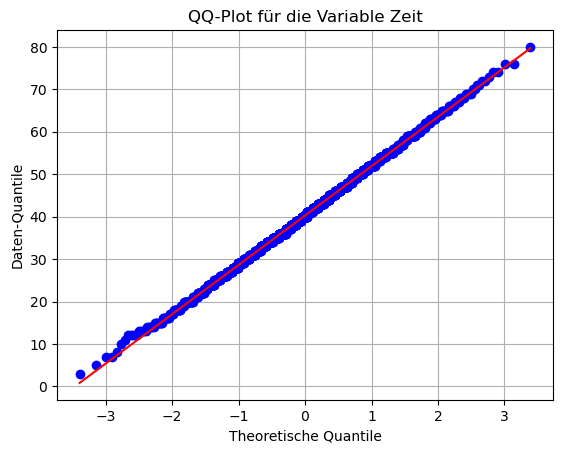

In [83]:
stats.probplot(df_final['Zeit'], dist="norm", plot=plt)
plt.title('QQ-Plot für die Variable Zeit')
plt.xlabel('Theoretische Quantile')
plt.ylabel('Daten-Quantile')
plt.grid(True)
plt.show()

### F13

In [63]:
print("Die Anzahl der Kunden, die einen Kredit aufnehmen mussten ist " + str(sum((df_kunden['Preis'] >= df_kunden['Einkommen'])))+".")

Die Anzahl der Kunden, die einen Kredit aufnehmen mussten ist 1098.


### F14 Einfluss sozioökonomischer Merkmale auf den Kaufpreis

# Datei speichern

In [68]:
#df_final.to_csv('df_final.csv')